In [3]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [4]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [5]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [6]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [7]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,300,0)

Vizualize data

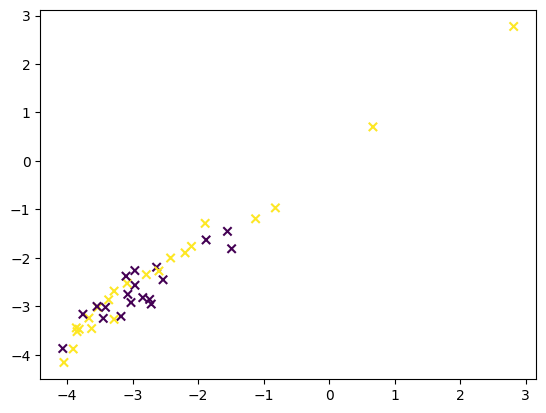

In [8]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(110,120).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [14]:
csp_test_classifiers(2,time_config, 120, 110)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 765ms/step - loss: 0.3529 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3521 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3512 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3503 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3494 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3485 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3477 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3468 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3459 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3450 - accuracy: 0.4375
Epoch 11/15
1/1 [===================

1/1 [==============================] - 0s 125ms/step - loss: 0.1531 - accuracy: 0.8889
Epoch 1/15
1/1 [==============================] - 0s 472ms/step - loss: 0.2358 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2353 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2335 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2330 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2321 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2341 - accuracy: 0.6875
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2481 - accuracy: 0.5556
Epoch 1/15
1/1 [==============================] - 0s 478ms/step - loss: 0.2314 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2310 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2308 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2304 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2716 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2709 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.4688
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2702 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2695 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2687 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2751 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2745 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2739 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2733 - accuracy: 0.4688
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2726 - accuracy: 0.4688
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2720 - accuracy: 0.4688
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.1471 - accuracy: 0.8889
Epoch 1/15
1/1 [==============================] - 0s 480ms/step - loss: 0.2558 - accuracy: 0.4062
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2556 - accuracy: 0.6250
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2438 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2433 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2193 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 0s 476ms/step - loss: 0.2933 - accuracy: 0.1250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.3125
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2925 - accuracy: 0.3125
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2921 - accuracy: 0.3125
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.3125
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.3125
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2910 - accuracy: 0.3125
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2786 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2781 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2777 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2772 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2768 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2759 - accuracy: 0.5625
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2754 - accuracy: 0.5625
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.7188
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2269 - accuracy: 0.7188
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.7188
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.7188
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.7188
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.7188
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2258 - accuracy: 0.7188
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2255 - accuracy: 0.7188
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.2126 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 0s 462ms/step - loss: 0.2579 - accuracy: 0.6250
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2573 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 0s 440ms/step - loss: 0.2398 - accuracy: 0.5625
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2397 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2395 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2394 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2392 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2391 - accuracy: 0.5625
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 469ms/step - loss: 0.3444 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3437 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3429 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3422 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3415 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3408 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3400 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3393 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3386 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3378 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3341 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3317 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3311 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3298 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3254 - accuracy: 0.3333
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3261 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3255 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3243 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.3173 - accuracy: 0.4444
Epoch 1/15
1/1 [==============================] - 0s 465ms/step - loss: 0.2724 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2720 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2717 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2714 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2711 - accuracy: 0.4688
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 113ms/step - loss: 0.3434 - accuracy: 0.4444
Epoch 1/15
1/1 [==============================] - 0s 463ms/step - loss: 0.3169 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3155 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3149 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3142 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2438 - accuracy: 0.6875
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.6875
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2434 - accuracy: 0.6875
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2432 - accuracy: 0.6875
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2429 - accuracy: 0.6875
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2427 - accuracy: 0.6875
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.6875
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2423 - accuracy: 0.6875
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2421 - accuracy: 0.6875
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2418 - accuracy: 0.6875
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2523 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2521 - accuracy: 0.4688
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2519 - accuracy: 0.4688
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.4688
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.2804 - accuracy: 0.5556
Epoch 1/15
1/1 [==============================] - 0s 480ms/step - loss: 0.2492 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2490 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2489 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2487 - accuracy: 0.5312
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 116ms/step - loss: 0.2447 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 0s 466ms/step - loss: 0.2956 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2934 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2918 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2913 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2195 - accuracy: 0.5938
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2193 - accuracy: 0.5938
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2191 - accuracy: 0.5938
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.5938
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2187 - accuracy: 0.5938
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.5938
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.5938
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2180 - accuracy: 0.5938
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2178 - accuracy: 0.5938
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.5938
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3124 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2170 - accuracy: 0.5556
Epoch 1/15
1/1 [==============================] - 0s 470ms/step - loss: 0.2377 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2374 - accuracy: 0.5938
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2370 - accuracy: 0.5938
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2691 - accuracy: 0.5312
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2445 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 506ms/step - loss: 0.2223 - accuracy: 0.6562
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2220 - accuracy: 0.6562
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2216 - accuracy: 0.6562
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2213 - accuracy: 0.6562
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2210 - accuracy: 0.6562
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 0.6562
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2203 - accuracy: 0.6562
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.6562
Epoch 9/15
1/1 [==============================

In [15]:
dwt_test_classifiers(1,'db2',time_config)

Epoch 1/15
1/1 [==============================] - 0s 470ms/step - loss: 0.2771 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2747 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2734 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2710 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2698 - accuracy: 0.5938
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2685 - accuracy: 0.5938
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2673 - accuracy: 0.5938
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2661 - accuracy: 0.5938
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 0.2690 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2677 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2663 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2650 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2636 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2610 - accuracy: 0.4688
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2596 - accuracy: 0.4688
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2583 - accuracy: 0.4688
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2691 - accuracy: 0.3333
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2782 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2764 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2626 - accuracy: 0.4444
Epoch 1/15
1/1 [==============================] - 0s 486ms/step - loss: 0.3053 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3038 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3023 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3007 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2992 - accuracy: 0.4688
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 149ms/step - loss: 0.2309 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.3405 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3390 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3375 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3359 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3344 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 14ms/step - loss: 0.3297 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3282 - accuracy: 0.5312
Epoch 10/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2776 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2754 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2731 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2709 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 0.5625
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2664 - accuracy: 0.5938
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.5938
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2619 - accuracy: 0.5938
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2598 - accuracy: 0.5938
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2433 - accuracy: 0.6875
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2413 - accuracy: 0.6875
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2394 - accuracy: 0.6875
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2374 - accuracy: 0.6875
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2355 - accuracy: 0.6875
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.2837 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 0s 485ms/step - loss: 0.2127 - accuracy: 0.6875
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.6875
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2092 - accuracy: 0.6875
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2074 - accuracy: 0.6875
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 113ms/step - loss: 0.3368 - accuracy: 0.4444
Epoch 1/15
1/1 [==============================] - 0s 461ms/step - loss: 0.2766 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2752 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2693 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2679 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2665 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2650 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2953 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2909 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2845 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2803 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2761 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3026 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2993 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2976 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2959 - accuracy: 0.5312
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2868 - accuracy: 0.4444
Epoch 1/15
1/1 [==============================] - 0s 449ms/step - loss: 0.2365 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2334 - accuracy: 0.5000
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 11ms/step - loss: 0.2870 - accuracy: 0.5312
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3392 - accuracy: 0.5556
Epoch 1/15
1/1 [==============================] - 0s 464ms/step - loss: 0.3959 - accuracy: 0.3438
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3938 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3895 - accuracy: 0.4062
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3873 - accuracy: 0.4062
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3851 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3829 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3807 - accuracy: 0.4062
Epoch 9/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3566 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3546 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3527 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3507 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3487 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3467 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3447 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3427 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3408 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2964 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2939 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2903 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3949 - accuracy: 0.0000e+00
Epoch 1/15
1/1 [==============================] - 0s 463ms/step - loss: 0.3058 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.4375
Epoch 3/15
1/1 [=====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.6875
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2034 - accuracy: 0.7188
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2544 - accuracy: 0.7778
Epoch 1/15
1/1 [==============================] - 0s 463ms/step - loss: 0.2224 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2214 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2204 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2194 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2174 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2163 - accuracy: 0.6250
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2518 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2506 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2493 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2468 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2455 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2430 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2418 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2406 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.3756 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3738 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3721 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3685 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3667 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3649 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3631 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3632 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 0s 441ms/step - loss: 0.2740 - accuracy: 0.4688
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2693 - accuracy: 0.6562
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.6562
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.6562
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2186 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 504ms/step - loss: 0.2275 - accuracy: 0.6562
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.6562
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.6562
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2237 - accuracy: 0.6562
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2224 - accuracy: 0.6562
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2212 - accuracy: 0.6562
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 468ms/step - loss: 0.2276 - accuracy: 0.5938
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.5938
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.5938
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2246 - accuracy: 0.5938
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.5938
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2226 - accuracy: 0.5938
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2217 - accuracy: 0.5938
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2207 - accuracy: 0.5938
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.5938
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.5938
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2666 - accuracy: 0.5938
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2650 - accuracy: 0.5938
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.5938
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.5938
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.5938
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2586 - accuracy: 0.5938
Epoch 12/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2571 - accuracy: 0.5938
Epoch 13/15
1/1 [==============================] - 0s 15ms/step - loss: 0.2555 - accuracy: 0.5938
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2540 - accuracy: 0.5938
Epoch 15/15
1/1 [==============================] - 0s 164ms/step - loss: 0.2635 - accuracy: 0.3333
Epoch 1/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2858 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2843 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2828 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2824 - accuracy: 0.4444
Epoch 1/15
1/1 [==============================] - 0s 489ms/step - loss: 0.2813 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2769 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2754 - accuracy: 0.4688
Epoch 6/15
1/1 [===========================

left vs right

In [16]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,400,200)

In [17]:
csp_test_classifiers(10,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_16804\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

Epoch 1/15
1/1 [==============================] - 1s 589ms/step - loss: 0.2275 - accuracy: 0.6774
Epoch 2/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2266 - accuracy: 0.6774
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2257 - accuracy: 0.6774
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2248 - accuracy: 0.6774
Epoch 5/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2239 - accuracy: 0.6774
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2230 - accuracy: 0.7097
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2221 - accuracy: 0.7419
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2212 - accuracy: 0.7419
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2203 - accuracy: 0.7419
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2195 - accuracy: 0.7419
Epoch 11/15
1/1 [==================

1/1 [==============================] - 0s 6ms/step - loss: 0.2228 - accuracy: 0.5806
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.5806
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2218 - accuracy: 0.5806
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.5806
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2208 - accuracy: 0.5806
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2203 - accuracy: 0.5806
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.5806
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2193 - accuracy: 0.5806
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2188 - accuracy: 0.6129
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3604 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3110 - accuracy: 0.3871
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3103 - accuracy: 0.3871
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.3871
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.3871
Epoch 15/15
1/1 [==============================] - 0s 107ms/step - loss: 0.3667 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 0s 468ms/step - loss: 0.2974 - accuracy: 0.5161
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.5161
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.5161
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2937 - accuracy: 0.5161
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2924 - accuracy: 0.5161
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 117ms/step - loss: 0.3401 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 578ms/step - loss: 0.3066 - accuracy: 0.5161
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3057 - accuracy: 0.5161
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3048 - accuracy: 0.5484
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3038 - accuracy: 0.5484
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3029 - accuracy: 0.5484
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3020 - accuracy: 0.5484
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3002 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2993 - accuracy: 0.5806
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3061 - accuracy: 0.4194
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3050 - accuracy: 0.4194
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3039 - accuracy: 0.4194
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.4194
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3016 - accuracy: 0.4194
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.4194
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2995 - accuracy: 0.4194
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2984 - accuracy: 0.4194
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.4194
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.4194
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3366 - accuracy: 0.3871
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3354 - accuracy: 0.3871
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3343 - accuracy: 0.3871
Epoch 13/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3332 - accuracy: 0.3871
Epoch 14/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3321 - accuracy: 0.3871
Epoch 15/15
1/1 [==============================] - 0s 135ms/step - loss: 0.2685 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 557ms/step - loss: 0.3117 - accuracy: 0.4194
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3108 - accuracy: 0.4194
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.4194
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3089 - accuracy: 0.4194
Epoch 5/15
1/1 [========================

1/1 [==============================] - 0s 112ms/step - loss: 0.3825 - accuracy: 0.1250
Epoch 1/15
1/1 [==============================] - 1s 517ms/step - loss: 0.2626 - accuracy: 0.4839
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2617 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.5161
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.5161
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2590 - accuracy: 0.5161
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.5161
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 0.5161
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2564 - accuracy: 0.5161
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2555 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2749 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2736 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2723 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2709 - accuracy: 0.4516
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2696 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2683 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2670 - accuracy: 0.4516
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.4516
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2644 - accuracy: 0.4516
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2631 - accuracy: 0.4516
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2949 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2940 - accuracy: 0.4516
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.4516
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.4516
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.4516
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.4516
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2195 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 516ms/step - loss: 0.3120 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3108 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3096 - accuracy: 0.4839
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3151 - accuracy: 0.3871
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2968 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.2238 - accuracy: 0.6452
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2226 - accuracy: 0.6452
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2213 - accuracy: 0.6452
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2201 - accuracy: 0.6452
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.6452
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2178 - accuracy: 0.6452
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2166 - accuracy: 0.6452
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2154 - accuracy: 0.6452
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3690 - accuracy: 0.2903
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3680 - accuracy: 0.2903
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3669 - accuracy: 0.2903
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3659 - accuracy: 0.2903
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3649 - accuracy: 0.2903
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3638 - accuracy: 0.2903
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3628 - accuracy: 0.2903
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3618 - accuracy: 0.2903
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3607 - accuracy: 0.2903
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3597 - accuracy: 0.2903
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2621 - accuracy: 0.4516
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.4516
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2605 - accuracy: 0.4516
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.4516
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.4516
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.3114 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.2662 - accuracy: 0.4194
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2652 - accuracy: 0.4194
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2075 - accuracy: 0.6774
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2067 - accuracy: 0.6774
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.3524 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 519ms/step - loss: 0.3030 - accuracy: 0.5484
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3021 - accuracy: 0.5484
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3012 - accuracy: 0.5484
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3003 - accuracy: 0.5806
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.5806
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.5806
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.5806
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3450 - accuracy: 0.4516
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3439 - accuracy: 0.4516
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3428 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3417 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3407 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3396 - accuracy: 0.4516
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3386 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.4516
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3355 - accuracy: 0.4516
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2817 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2809 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2802 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2794 - accuracy: 0.5484
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2786 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2778 - accuracy: 0.5484
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.5484
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2763 - accuracy: 0.5484
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2322 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 488ms/step - loss: 0.2783 - accuracy: 0.5484
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3085 - accuracy: 0.5161
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3076 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.5161
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2419 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 509ms/step - loss: 0.2745 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2733 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2720 - accuracy: 0.4839
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.4839
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2695 - accuracy: 0.4839
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2682 - accuracy: 0.4839
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 536ms/step - loss: 0.3982 - accuracy: 0.3226
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.3226
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3947 - accuracy: 0.3226
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3930 - accuracy: 0.3226
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3913 - accuracy: 0.3226
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3895 - accuracy: 0.3226
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3878 - accuracy: 0.3226
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3861 - accuracy: 0.3226
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.3226
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3826 - accuracy: 0.3226
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2392 - accuracy: 0.6129
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2382 - accuracy: 0.6129
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.6129
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2361 - accuracy: 0.6129
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2351 - accuracy: 0.6129
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2341 - accuracy: 0.6129
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2331 - accuracy: 0.6129
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2321 - accuracy: 0.6129
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.6129
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2885 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2476 - accuracy: 0.6774
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 0.6774
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2459 - accuracy: 0.6774
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2450 - accuracy: 0.6774
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.3376 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 509ms/step - loss: 0.2765 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2754 - accuracy: 0.4516
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2743 - accuracy: 0.4516
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2732 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.4516
Epoch 6/15
1/1 [===========================

In [18]:
dwt_test_classifiers(1,'db5',time_config)

Epoch 1/15
1/1 [==============================] - 1s 517ms/step - loss: 0.2656 - accuracy: 0.6774
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2646 - accuracy: 0.6774
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2635 - accuracy: 0.6774
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.6774
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.6774
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2603 - accuracy: 0.6774
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.6774
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2581 - accuracy: 0.6774
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2570 - accuracy: 0.6774
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.6774
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.4839
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3333 - accuracy: 0.4839
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3319 - accuracy: 0.4839
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.4839
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3291 - accuracy: 0.4839
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.4839
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3264 - accuracy: 0.4839
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3250 - accuracy: 0.4839
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.4839
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.4331 - accuracy: 0.1250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2729 - accuracy: 0.5161
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2720 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0.5161
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.3052 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 472ms/step - loss: 0.2344 - accuracy: 0.5806
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2330 - accuracy: 0.6452
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.6452
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2304 - accuracy: 0.6774
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.7097
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 109ms/step - loss: 0.2503 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 482ms/step - loss: 0.2657 - accuracy: 0.6774
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2646 - accuracy: 0.7097
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.7097
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.7097
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.7419
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.7419
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2589 - accuracy: 0.7419
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.7419
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2566 - accuracy: 0.7742
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.5161
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2902 - accuracy: 0.5161
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2889 - accuracy: 0.5161
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.5161
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2864 - accuracy: 0.5161
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2852 - accuracy: 0.4839
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.4839
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2828 - accuracy: 0.4839
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.4839
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2804 - accuracy: 0.4839
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2328 - accuracy: 0.5484
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2317 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2306 - accuracy: 0.5484
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2295 - accuracy: 0.5484
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.5484
Epoch 15/15
1/1 [==============================] - 1s 517ms/step - loss: 0.3221 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 492ms/step - loss: 0.3228 - accuracy: 0.4839
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3214 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3200 - accuracy: 0.4839
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3186 - accuracy: 0.4839
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 112ms/step - loss: 0.3019 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 475ms/step - loss: 0.3138 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.4516
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3111 - accuracy: 0.4516
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3083 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3069 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3056 - accuracy: 0.4516
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3127 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3110 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3077 - accuracy: 0.4516
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.4516
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.4516
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2995 - accuracy: 0.4516
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.4516
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3094 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.4516
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.4516
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.4516
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3049 - accuracy: 0.4516
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3037 - accuracy: 0.4516
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3141 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 526ms/step - loss: 0.3016 - accuracy: 0.4839
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3004 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2992 - accuracy: 0.4839
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.4194
Epoch 15/15
1/1 [==============================] - 0s 106ms/step - loss: 0.2654 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 518ms/step - loss: 0.2558 - accuracy: 0.5161
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2547 - accuracy: 0.5161
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.5161
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.5161
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.5484
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.5484
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2492 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2481 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2993 - accuracy: 0.4516
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.4839
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.4839
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2950 - accuracy: 0.4839
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.4839
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.4839
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.4839
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.4839
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2881 - accuracy: 0.5161
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.5161
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.4839
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2990 - accuracy: 0.4839
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2970 - accuracy: 0.4839
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.4839
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.4839
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.4839
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2889 - accuracy: 0.4839
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2233 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 478ms/step - loss: 0.3019 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.4516
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2542 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2531 - accuracy: 0.5161
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2195 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 503ms/step - loss: 0.3453 - accuracy: 0.4839
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3441 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3428 - accuracy: 0.4839
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3416 - accuracy: 0.4839
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3404 - accuracy: 0.4839
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.4839
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3380 - accuracy: 0.4839
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.5484
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.5484
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3073 - accuracy: 0.5484
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.5484
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3051 - accuracy: 0.5484
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3030 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3019 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.5484
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2190 - accuracy: 0.6452
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2178 - accuracy: 0.6452
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2167 - accuracy: 0.6452
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2156 - accuracy: 0.6452
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2145 - accuracy: 0.6452
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.6452
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.6452
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2113 - accuracy: 0.6452
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.2299 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 537ms/step - loss: 0.2650 - accuracy: 0.5161
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.3871
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0.3871
Epoch 14/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.3871
Epoch 15/15
1/1 [==============================] - 0s 106ms/step - loss: 0.2215 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 458ms/step - loss: 0.3265 - accuracy: 0.3871
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3252 - accuracy: 0.3871
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.4194
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.4194
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3212 - accuracy: 0.4194
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.4194
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 474ms/step - loss: 0.2239 - accuracy: 0.6774
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2230 - accuracy: 0.6774
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2221 - accuracy: 0.6774
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2212 - accuracy: 0.7097
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.7097
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2193 - accuracy: 0.7097
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2185 - accuracy: 0.7097
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2176 - accuracy: 0.7097
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2167 - accuracy: 0.7097
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2159 - accuracy: 0.7097
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2998 - accuracy: 0.4839
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2984 - accuracy: 0.4839
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.4839
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.4839
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2942 - accuracy: 0.4839
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.5161
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2915 - accuracy: 0.5161
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2901 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.5161
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.3055 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.5806
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2697 - accuracy: 0.5806
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.5806
Epoch 15/15
1/1 [==============================] - 0s 108ms/step - loss: 0.2533 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 523ms/step - loss: 0.2174 - accuracy: 0.6452
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2164 - accuracy: 0.6129
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2153 - accuracy: 0.6129
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2143 - accuracy: 0.6129
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2133 - accuracy: 0.6129
Epoch 6/15
1/1 [===========================

In [10]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [11]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [12]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [13]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
